In [ ]:
'''
Alejandro Fernández Trigo
'''

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [12]:
# Leer la imagen (monobanda):
img = cv2.imread('10_NorthCarolina.jpg', cv2.IMREAD_GRAYSCALE)

In [13]:
# Previo a la función corte necesitamos:
# Histograma del ejercicio 1 hecho rápido con OpenCV:
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
# Nº totales de píxeles:
shape = img.shape
n_pixeles = shape[0] * shape[1]
print("Nº pixeles: " + str(n_pixeles))
print("La dimension de la imagen es: " + str(img.shape))

Nº pixeles: 57170588


In [14]:
# Función expan del ejercicio 2:
def expan(img,cmin,cmax):
    copia = img.copy()
    for i in range(copia.shape[0]):
        for j in range(copia.shape[1]):
            if(img[i][j] <= cmin):
                # ND0 = 0 si ND ≤ NDcortemin
                copia[i][j] = 0
            elif(img[i][j] >= cmax):
                # ND0 = 255 si ND ≥ NDcortemax
                copia[i][j] = 255
            else:
                # ND0ij = ND0min + (NDij − NDcortemin)·(ND0max − ND0min)/(NDcortemax − NDcortemin)
                copia[i][j] =(0 + (img[i][j] - cmin) * (255 - 0) / ((cmax - cmin)))
    return copia

In [20]:
# Función corte:
def corte(img, porc):
    cMin = 0
    cMax = 0
    # Calculamos el nº de píxeles que quedan fuera en base al porcentaje:
    rango = n_pixeles * porc
    # Recorrer el histograma para calcular Cmin:
    contadorCmin = 0
    for i in range(256):
        contadorCmin += hist[i]
        if contadorCmin >= rango:
            cMin = 1 + i
            break # Fuera de rango => Paramos
    # Recorrer el histograma para calcular Cmin:
    contadorCmax = 0
    for j in range(256):
        contadorCmax += hist[255-i]
        if contadorCmax <= rango:
            cMax = 256 - i
    # Aplicar la expansión (Ej II) sobre los puntos antes calculados:     
    imagenExpandida = expan(img,cMin,cMax)
    return imagenExpandida

In [21]:
# Aplicar el corte: OJO QUE ESTO TARDA MÁS DE CUATRO MINUTOS EN ACABAR!
img_exp = corte(img, 0.01)

La dimension de la imagen es: (6548, 8731)


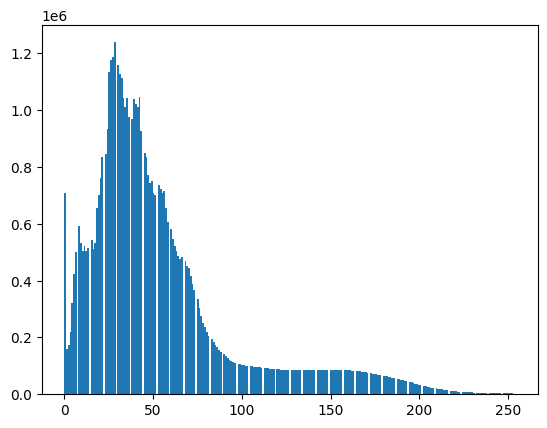

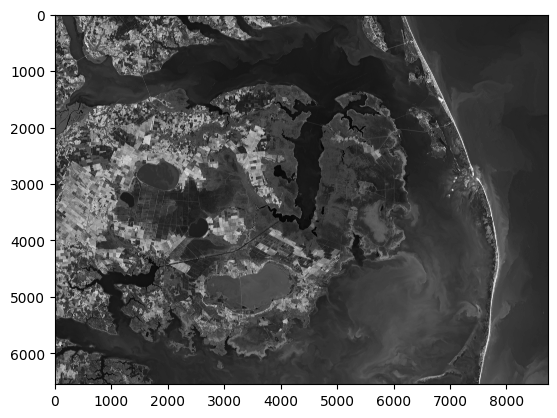

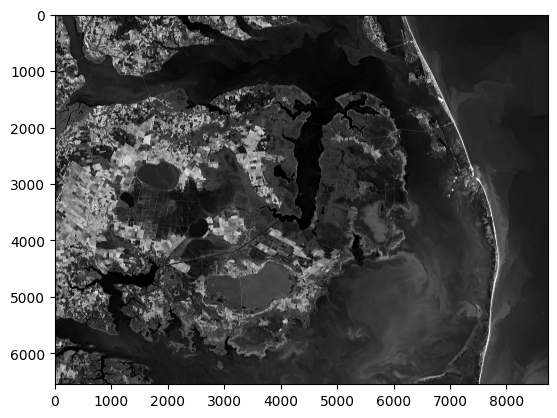

In [22]:
# Dibuja el histograma entre el 0 y el 254 (esto es del enunciado):
plt.hist(img_exp.ravel(), 255, [0,254], width=1)
plt.show()

# Muestra ambas imágenes:
plt.figure(1)
plt.imshow(img, cmap='gray')

plt.figure(2)
plt.imshow(img_exp, cmap='gray')

In [ ]:
'''
Se puede apreciar el corte de colas (porcentaje bajo).
'''